## Tensorflow

In [62]:
from sklearn.datasets import load_digits
digits = load_digits()

In [63]:
X = digits.data
Y = digits.target
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [64]:
print(X.max(), X.min())

16.0 0.0


In [65]:
X /= 16.0
print(X.min(), X.max())

0.0 1.0


In [66]:
from sklearn.model_selection import train_test_split#60,20,20

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.6)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size = 0.5)

In [68]:
print( x_train.shape, x_val.shape, x_test.shape)
print( y_train.shape, y_val.shape, y_test.shape)

(1078, 64) (360, 64) (359, 64)
(1078,) (360,) (359,)


In [69]:
print(y_train)

[4 8 8 ... 8 4 2]


In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
plt.figure(figsize=(20,4))

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

In [72]:
inicial = 500

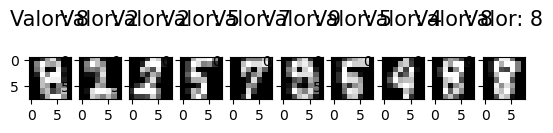

In [73]:
for index, (imagen, etiqueta) in enumerate(zip(X[inicial:inicial+10], Y[inicial:inicial+10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(imagen, (8,8)), cmap=plt.cm.gray)
 plt.title('Valor: %i\n' % etiqueta, fontsize = 15)

In [74]:
import tensorflow
from tensorflow.keras.utils import to_categorical

In [75]:
print(y_train[56])
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)
print(y_train[56])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [77]:
model = Sequential()
model.add(Dense(6, input_shape=(64,), activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 6)                 390       
                                                                 
 dense_25 (Dense)            (None, 6)                 42        
                                                                 
 dense_26 (Dense)            (None, 8)                 56        
                                                                 
 dense_27 (Dense)            (None, 10)                90        
                                                                 
Total params: 578 (2.26 KB)
Trainable params: 578 (2.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Otra manera de definir un modelo:

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


inputs = Input(shape=(64,))
x1 = Dense(6, activation='sigmoid')(inputs)
x2 = Dense(6, activation='sigmoid')(x1)
x3 = Dense(8, activation='sigmoid')(x2)
x4 = Dense(10, activation='softmax')(x3)

model = Model(inputs=inputs, outputs=x4)
model.summary()

In [78]:
import  tensorflow as tf
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate = 1e-3), metrics = ['accuracy'])

In [79]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200


2023-09-21 15:05:10.945392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 15ms/step - loss: 2.4644 - accuracy: 0.0993 - val_loss: 2.4570 - val_accuracy: 0.0889
Epoch 2/200
 8/34 [======>.......................] - ETA: 0s - loss: 2.5109 - accuracy: 0.0898

2023-09-21 15:05:11.450210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 10ms/step - loss: 2.4611 - accuracy: 0.0993 - val_loss: 2.4536 - val_accuracy: 0.0889
Epoch 3/200
34/34 [==============================] - 0s 9ms/step - loss: 2.4579 - accuracy: 0.0993 - val_loss: 2.4504 - val_accuracy: 0.0889
Epoch 4/200
34/34 [==============================] - 0s 9ms/step - loss: 2.4547 - accuracy: 0.0993 - val_loss: 2.4472 - val_accuracy: 0.0889
Epoch 5/200
34/34 [==============================] - 0s 9ms/step - loss: 2.4516 - accuracy: 0.0993 - val_loss: 2.4441 - val_accuracy: 0.0889
Epoch 6/200
34/34 [==============================] - 0s 9ms/step - loss: 2.4486 - accuracy: 0.0993 - val_loss: 2.4411 - val_accuracy: 0.0889
Epoch 7/200
34/34 [==============================] - 0s 10ms/step - loss: 2.4457 - accuracy: 0.0993 - val_loss: 2.4382 - val_accuracy: 0.0889
Epoch 8/200
34/34 [==============================] - 0s 10ms/step - loss: 2.4428 - accuracy: 0.0993 - val_loss: 2.4353 - val_accuracy: 0.0889
Epoch 9/200
34/34 [===